# Time Series sample_3
* *Università Di Cagliari: Metodi Di Analisi Econometrica*
* *Alessio Cappai*

## Indice
1. [Analisi della serie storica](#cap1)
2. [Analisi dei modelli: AR(1)](#cap2)  
    2.1 [Test Dickey-Fuller](#par21)
3. [Analisi dei modelli: ARIMA(0,1,0)](#cap3)
4. [Analisi delle differenze prime](#cap4)  
    4.1 [Test Ljung-Box](#par41)
5. [Criteri di informazione](#cap5)

In [1]:
from IPython.display import HTML

HTML('''<style>
.output {
    align-items: center;<!-- tutti gli output sono centrati -->
}
.prompt{width: 0px; min-width: 0px; visibility: collapse} <!-- rimuove la notazione "Out"-->
</style>
<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Per facilitare la lettura, il codice è nascosto.
Per mostrarlo, clicca <a href=\"javascript:code_toggle()\">qui</a>.''')

In [2]:
import pandas as pd
import seaborn as sns
sns.set()

import statsmodels.api as sm
import statsmodels.tsa as smt

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("sample_3.csv", header=None)
del data[0]
data.columns = ['Values']

## 1. Analisi della serie storica <a class="anchor" id="cap1" ></a>
La serie oggetto di analisi è caratterizzata graficamente dalla **presenza di pattern** e, ad una prima occhiata, sembra necessario escludere che la serie sia un white noise.

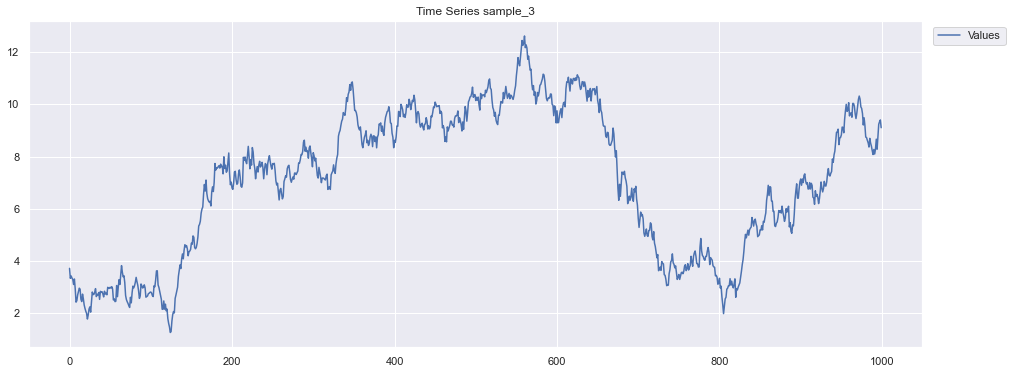

In [4]:
fig = data.plot(figsize=(16,6), title='Time Series sample_3').legend(bbox_to_anchor=(1.1, 1))

A testimonianza di questo, la statistica Q calcolata nel **test di Ljung-Box** corrisponde ad un pvalue pari a zero; di conseguenza è necessario rifiutare l’ipotesi nulla che la serie rappresenti una realizzazione di un processo white noise.

In [5]:
ljungbox = sm.stats.acorr_ljungbox(x=data, lags=[32], return_df=True)
ljungbox.columns = ['stat', 'pvalue']
ljungbox.index = ['Ljung-Box test']
ljungbox.iloc[0,0] = round(ljungbox.iloc[0,0], 2)
ljungbox

,stat,pvalue
Ljung-Box test,26814.88,0.0


Per meglio analizzare quale sia la natura dei pattern individuati graficamente, è possibile fare riferimento al **correlogramma** della serie

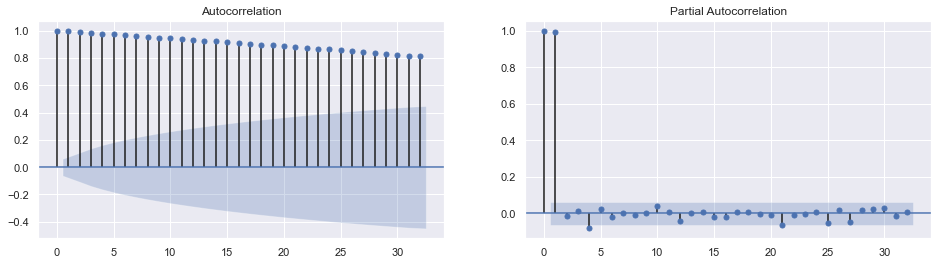

In [6]:
acf = sm.graphics.tsa.plot_acf(x=data, ax=plt.subplot(1,2,1), lags=32).set_figwidth(16)
pacf = sm.graphics.tsa.plot_pacf(x=data, ax=plt.subplot(1,2,2), lags=32).set_figwidth(16)

Questo mostra come la serie storica sia caratterizzata da due elementi:
1. L’**autocorrelazione** (AC) assume un valore prossimo a uno nel primo periodo, per poi gradualmente diminuire nei periodi successivi;
2. L’**autocorrelazione parziale** (PAC) assume un valore prossimo ad uno esclusivamente nel primo periodo, per poi assumere valori prossimi a zero nei periodi successivi.

## 2. Analisi dei modelli: AR(1) <a class="anchor" id="cap2"></a>
Questi due fenomeni suggeriscono che la serie non sia altro che la realizzazione di un **processo autoregressivo** di ordine uno. Tuttavia, effettuata la stima di un modello 𝐴𝑅(1), è possibile notare come il coefficiente stimato sia prossimo a 1, tanto che il corrispondente intervallo di fiducia contiene al suo interno il valore unitario.

In [7]:
ar_1 = smt.arima_model.ARIMA(data, order=(1,0,0)).fit()
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Values   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood                 -58.328
Method:                       css-mle   S.D. of innovations              0.256
Date:                Sat, 11 Jul 2020   AIC                            122.656
Time:                        10:07:46   BIC                            137.379
Sample:                             0   HQIC                           128.252
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8382      1.563      4.376      0.000       3.775       9.901
ar.L1.Values     0.9957      0.003    378.275      0.000       0.991       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0043           +0.0000j            1.0043            0.0000
-----------------------------------------------------------------------------
"""

### 2.1 Test Dickey-Fuller <a class="anchor" id="par21"> </a>
Pertanto, è necessario verificare se la serie storica sia o meno la realizzazione di un processo unit root: attraverso il test di Dickey-Fuller aumentato non è infatti possibile rifiutare l’ipotesi nulla che la variabile segua un processo *unit
root*, in quanto il pvalue è superiore a qualsiasi livello critico ragionevole.

In [8]:
adf = smt.stattools.adfuller(data, maxlag=32)
adf = pd.DataFrame(data=adf[0:2], index=['test statistic', 'pvalue'], columns=['Augmented Dickey-Fuller'])
adf

,Augmented Dickey-Fuller
test statistic,-1.741610
pvalue,0.409811


## 3. Analisi dei modelli: ARIMA(0,1,0) <a class="anchor" id="cap3"> </a>
La variabile in oggetto non sembra essere la realizzazione di un processo stazionario: per analizzarla è necessario considerare nella stima un’**integrazione** alle differenze prime. Il modello preso a riferimento è dunque l’*Auto Regressive Integrated Moving Average* con un periodo di integrazione, privo di componenti *Moving Average* o *Auto Regressive*, cioè $𝐴𝑅𝐼𝑀𝐴(0, 1, 0)$. La specificazione scelta indica che la serie storica, se presa nelle sue differenze prime, non è altro che una Random Walk, e segue pertanto un processo white noise.

In [9]:
arima_010 = smt.arima_model.ARIMA(data, order=(0,1,0)).fit()
arima_010.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Values   No. Observations:                  999
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -56.748
Method:                           css   S.D. of innovations              0.256
Date:                Sat, 11 Jul 2020   AIC                            117.497
Time:                        10:07:46   BIC                            127.310
Sample:                             1   HQIC                           121.227
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.008      0.665      0.506      -0.010       0.021
==============================================================================
"""

## 4. Analisi delle differenze prime <a class="anchor" id="cap4"></a>
Per verificare questo, è possibile analizzare la serie nelle sue differenze attraverso gli strumenti già utilizzati prima per lo studio del suo comportamento nei livelli. In particolare, l’**analisi grafica** esclude la presenza di qualsiasi pattern.

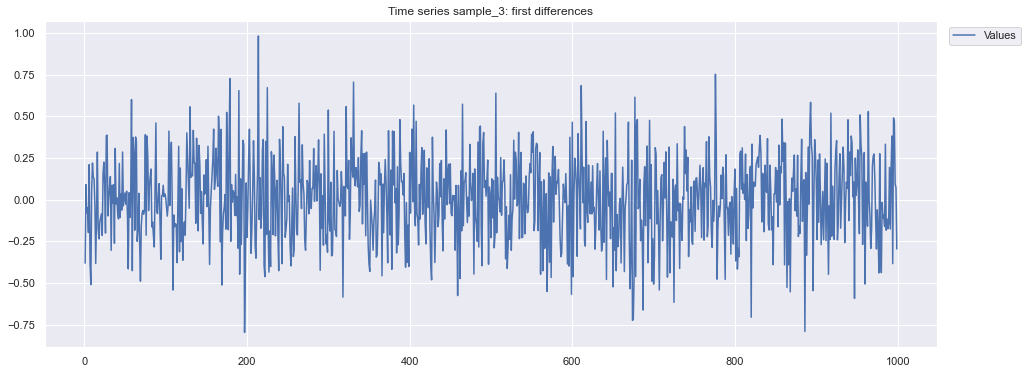

In [10]:
data_1d = data.diff().dropna()
fig2 = data_1d.plot(figsize=(16,6), title='Time series sample_3: first differences').legend(bbox_to_anchor=(1.1, 1))

### 4.1 Test Ljung-Box <a class="anchor" id="par41"></a>
La statistica Q del test Ljung-Box assume un valore tale che non ci permette di rifiutare l’ipotesi che la serie nelle  differenze sia un white noise. Di conseguenza, il modello specificato cattura **tutte le informazioni possibili**.

In [11]:
ljungbox_1d = sm.stats.acorr_ljungbox(x=data_1d, lags=[32], return_df=True)
ljungbox_1d.columns = ['stat', 'pvalue']
ljungbox_1d.index = ['Ljung-Box test']
ljungbox_1d

,stat,pvalue
Ljung-Box test,17.575264,0.981807


## 5. Criteri di informazione <a class="anchor" id="cap5"></a>
Infine, come ultima prova della validità del modello, è possibile confrontare questo con il modello inizialmente proposto, vale a dire 𝐴𝑅(1) , attraverso i criteri di informazione: anche in questo caso, i valori l’Akaike Information Criterion (AIC) e il
Bayesian Information Criterion (BIC) sono più bassi, a testimonianza del fatto che il modello 𝐴𝑅𝐼𝑀𝐴(0, 1, 0) è preferibile.

In [20]:
inf_criterion = pd.DataFrame({'AR(1)':(ar_1.aic, ar_1.bic), 'ARIMA(0,1,0)':(arima_010.aic, arima_010.bic)},
                            index = ['AIC', 'BIC']).T
inf_criterion = round(inf_criterion, 2)
inf_criterion

,AIC,BIC
AR(1),122.66,137.38
"ARIMA(0,1,0)",117.50,127.31


In [14]:
!jupyter nbconvert Untitled.ipynb --to slides --post serve --SlidesExporter.reveal_theme=white --SlidesExporter.reveal_scroll=False --SlidesExporter.reveal_transition=fade

# SlidesExporter.reveal_theme: tema delle slides, scelta tra:
# beige, black, blood, league, moon, night, serif, simple, sky, solarized, white

# SlidesExporter.reveal_scroll: True/False, abilita lo scrolling all'interno delle slide

# SlidesExporter.reveal_transition: effetto transizione, scelta tra:
# default, fade, slide, convex, concave, zoom

# fonte:https://nbconvert.readthedocs.io/en/latest/config_options.html

[NbConvertApp] Converting notebook Untitled.ipynb to slides
[NbConvertApp] Writing 507312 bytes to Untitled.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\utente\appdata\local\programs\python\python38-32\lib\runpy.py", line 193, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\utente\appdata\local\programs\python\python38-32\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Utente\AppData\Local\Programs\Python\Python38-32\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\utente\appdata\local\programs\python\python38-32\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\utente\appdata\local\programs\python\python38-32\lib\site-packages\traitlets\config\appl